In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('./data/public_layout.csv')

Ilość urządzeń elektrycznych, id nas nie obchodzi, wszystko co się wiąże z zużyciem prądu

In [12]:
df = pd.read_csv('./data/recs2009_public.csv')

In [13]:
# usefull_columns = ['YEARMADERANGE', 'YEARMADE',
#                    'TOTROOMS', 'CELLAR', 'BASECOOL', 'ATTIC', 'PCTATTHT', 'PRKGPLC1', 'SIZEOFGARAGE',
#                    'STOVEN', 'DISHWASH', 'TVCOLOR', 
#                    ]

Wybór kolumn do dalszego przetwarzania

In [14]:
useful_columns = ['YEARMADE',
                   'TOTROOMS', 'CELLAR', 'ATTIC', 'PRKGPLC1', 'SIZEOFGARAGE',
                   'STOVEN', 'DISHWASH', 'TVCOLOR', "NUMPC", "EQUIPAUX", "TEMPNITE", "TEMPNITEAC", "HELPCFL", "NHSLDMEM", "ATHOME",
                   "TOTHSQFT", "TOTALBTU", 'INSTLCFL'
                   ]

In [15]:
df = df[useful_columns]

Zastąpienie temperatur w Farenheitach stopniami Celciusza

In [16]:
# TEMPNITE     TEMPNITEAC
# df = df.assign(Fahrenheit = lambda x: (9/5)*x['Celsius']+32)
# df['foo'] = df.apply(lambda _: '', axis=1)
df['TEMPNITEAC_CELCIUS'] = df.apply(lambda _: '', axis=1)

In [17]:
df['TEMPNITE_CELCIUS'] = (df['TEMPNITE'] - 32) * (5/9)
df['TEMPNITEAC_CELCIUS'] = (df['TEMPNITEAC'] - 32) * (5/9)
df.drop(columns=['TEMPNITE', 'TEMPNITEAC'],axis=1, inplace=True)

In [18]:
df

,YEARMADE,TOTROOMS,CELLAR,ATTIC,PRKGPLC1,SIZEOFGARAGE,STOVEN,DISHWASH,TVCOLOR,NUMPC,EQUIPAUX,HELPCFL,NHSLDMEM,ATHOME,TOTHSQFT,TOTALBTU,INSTLCFL,TEMPNITEAC_CELCIUS,TEMPNITE_CELCIUS
0,2004,9,1,0,1,2,1,1,4,2,0,0,4,0,3958,63006,1,22.777778,20.000000
1,1998,4,0,0,1,2,1,0,2,2,1,-2,6,1,2736,103460,-2,-18.888889,22.777778
2,1965,2,-2,-2,-2,-2,1,0,1,1,0,0,1,0,528,58716,1,-18.888889,18.333333
3,1985,7,0,0,1,2,0,1,5,2,0,-2,1,1,1623,76401,-2,20.000000,12.777778
4,1983,5,1,0,0,-2,1,1,2,2,0,0,1,0,1274,59809,1,-18.888889,21.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,1985,6,1,0,1,2,1,1,2,1,1,0,1,0,893,75702,1,-18.888889,15.555556
12079,1980,1,0,0,-2,-2,1,0,1,0,1,-2,1,0,502,25251,-2,-18.888889,32.222222
12080,1993,8,0,0,1,2,1,1,4,1,1,0,4,0,4181,148252,1,-18.888889,18.333333
12081,1930,5,1,0,0,-2,1,0,2,1,0,-2,1,0,864,81978,-2,-18.888889,17.777778


Usunięcie kłopotliwych -2

In [9]:
# Replacing tricki -2 values with 0 in selected columns
for col in ['CELLAR', 'ATTIC', 'PRKGPLC1', 'INSTLCFL']:
    for i in range(len(df)):
        if df.loc[i, col] == -2:
            df.loc[i, col] = 0

C:\Users\janek\AppData\Local\Temp\ipykernel_12648\4014895529.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


array([[<AxesSubplot:title={'center':'YEARMADE'}>,
        <AxesSubplot:title={'center':'TOTROOMS'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'ATTIC'}>,
        <AxesSubplot:title={'center':'PRKGPLC1'}>],
       [<AxesSubplot:title={'center':'SIZEOFGARAGE'}>,
        <AxesSubplot:title={'center':'STOVEN'}>,
        <AxesSubplot:title={'center':'DISHWASH'}>,
        <AxesSubplot:title={'center':'TVCOLOR'}>,
        <AxesSubplot:title={'center':'NUMPC'}>],
       [<AxesSubplot:title={'center':'EQUIPAUX'}>,
        <AxesSubplot:title={'center':'TEMPNITE'}>,
        <AxesSubplot:title={'center':'TEMPNITEAC'}>,
        <AxesSubplot:title={'center':'HELPCFL'}>,
        <AxesSubplot:title={'center':'NHSLDMEM'}>],
       [<AxesSubplot:title={'center':'ATHOME'}>,
        <AxesSubplot:title={'center':'TOTHSQFT'}>,
        <AxesSubplot:title={'center':'TOTALBTU'}>,
        <AxesSubplot:title={'center':'INSTLCFL'}>,
        <AxesSubplot:title={'center'

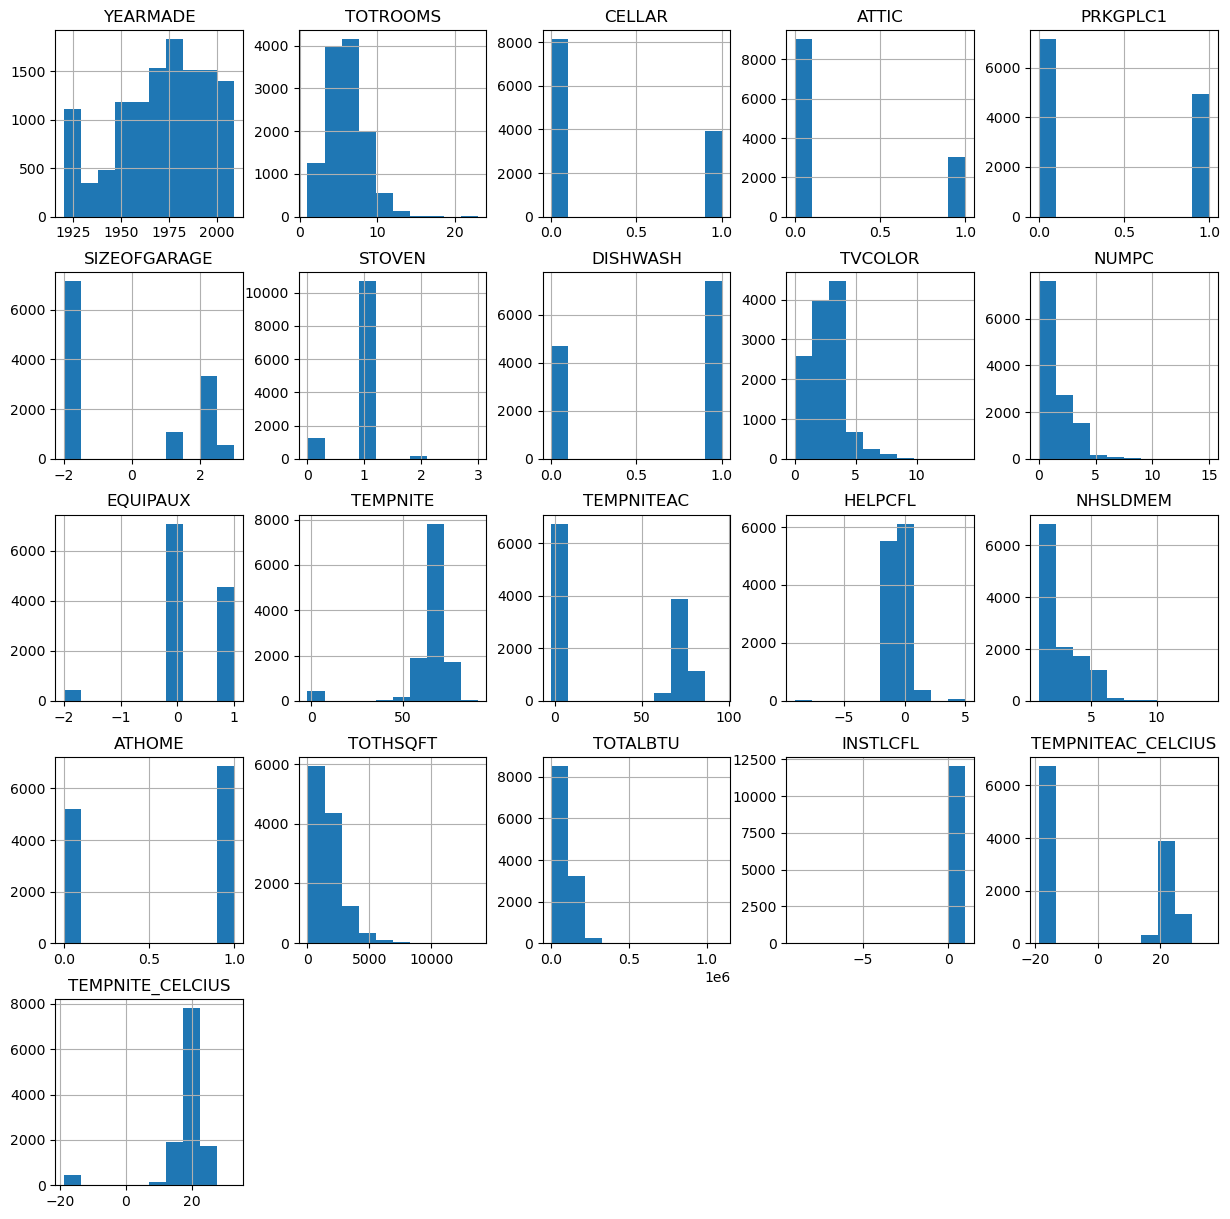

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
df.hist(ax=ax)